In [1]:
###########import packages##########
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn.linear_model import BayesianRidge
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import ExtraTreeClassifier
from sklearn import linear_model
from sklearn.preprocessing import label_binarize
from itertools import cycle
import lightgbm
import catboost
import xgboost
#import shap
from scipy import interp
#import seaborn as sns
from catboost import *
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import r2_score
#%matplotlib
###########wrapping root mean square error for later calls##########
def compute_mae_mse_rmse(target,prediction):
    error = []
    for i in range(len(target)):
        error.append(target[i] - prediction[i])
    squaredError = []
    absError = []
    for val in error:
        squaredError.append(val * val)  # target-prediction之差平方
        absError.append(abs(val))  # 误差绝对值
    mae=sum(absError)/len(absError)  # 平均绝对误差MAE
    mse=sum(squaredError)/len(squaredError)  # 均方误差MSE
    RMSE=np.sqrt(sum(squaredError)/len(squaredError))
    R2=r2_score(target,prediction)
    return mae,mse,RMSE,R2
###########loading data##########
fdata=pd.read_csv('database_filled_CD.csv',encoding="gbk")
raw_data=fdata.loc[:,[
                      'Operating Temperature (℃)',#0
                      'Operating Pressure (bar)',#1
                      'Flow Rate (mL min-1)',#2
                      'Active Area (cm2)', #3
                      'Ir wt. %',#4
                      'Ru wt.%',#5
                      'O wt. %',#6
                      'C wt. %',#7
                      'Pure_0/Supported_1',#8
                      'I/C in Anode',#9
                      'Pt wt. %',#10
                      'I/C in Cathode',#11  
                      'Anode Precious Metal Loading (mg cm-2 Ir/Ru/Pt/Pd)',#12
                      'Cathode Precious Metal Loading (mg cm-2 Pt/Pd)',#13
                      'CCM_0/GDE_1',#14    
                      'Membrane Thickness (μm)',#15
                      'EW',#16
                      'Minimum Stability Current Density (A cm-2)',#17
                      'Maximum Stability Current Density (A cm-2)',#18
                      'Fluctuation period (h)',#19
                      'Stability Test Time (h-1)'#20
                        ]]
###########train test splitting##########
raw_param=raw_data.iloc[:,0:21]
print('ready')

ready


In [2]:
CD18=fdata.loc[:,['Current at 1.8 V']].values

In [3]:
def summarize(list1):
    total=0
    for ele in range(0, len(list1)):
        total = total + list1[ele]
    return total

In [4]:
pca_3 = PCA(n_components=3)
chem_3 = pca_3.fit_transform(raw_data)     
pca_2 = PCA(n_components=2)
chem_2 = pca_2.fit_transform(raw_data)

In [5]:
def gridsearch(model,param,algorithm_name):
    grid = GridSearchCV(model,param_grid=param,cv=5,n_jobs=-1)
    grid.fit(X_train,y_train)
    best_model=grid.best_estimator_
    result = best_model.predict(X_test)
    x_prediction_07=result
    y_real_07=y_test[:,0]
    x_prediction_07_series=pd.Series(x_prediction_07)
    y_real_07_series=pd.Series(y_real_07)
    
    result_train = best_model.predict(X_train)
    x_prediction_07_train=result_train
    y_real_07_train=y_train[:,0]
    x_prediction_07_series_train=pd.Series(x_prediction_07_train)
    y_real_07_series_train=pd.Series(y_real_07_train)
    
    ###########evaluating the regression quality##########
    corr_ann = round(x_prediction_07_series.corr(y_real_07_series), 5)
    error_val= compute_mae_mse_rmse(x_prediction_07,y_real_07)
    
    corr_ann_train = round(x_prediction_07_series_train.corr(y_real_07_series_train), 5)
    error_val_train= compute_mae_mse_rmse(x_prediction_07_train,y_real_07_train)
    
    print(algorithm_name)
    print(best_model.feature_importances_)
    print('Best Regressor:',grid.best_params_,'Best Score:', grid.best_score_)
    print(error_val,'TEST R2',error_val[3],'TEST CORR',corr_ann)
    print(error_val_train,'TRAIN R2',error_val_train[3],'TRAIN CORR',corr_ann_train)
    x_y_x=np.arange(0,4.5,0.1)
    x_y_y=np.arange(0,4.5,0.1)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x_prediction_07,y_real_07,color='red',label=algorithm_name+' Test Set',alpha=0.75)
    ax.scatter(x_prediction_07_train,y_real_07_train,color='blue',label=algorithm_name+' Training Set',alpha=0.25,marker="^")
    ax.plot(x_y_x,x_y_y)
    plt.legend()
    plt.xlabel(u"Predicted_Current_Density (mA cm^-2)@1.8V (vs. RHE)")
    plt.ylabel(u"Real_Current_Density (mA cm^-2)@1.8V (vs. RHE)")
    plt.savefig('CD18 PCA 3D %s.png' %algorithm_name)
    print('finished')

In [6]:
seed=7
X_train, X_test, y_train, y_test = train_test_split(chem_3, CD18, test_size=.15,random_state=seed)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LightGBM
[586 596 744]
Best Regressor: {} Best Score: 0.33453908962881657
(0.09655243007192095, 0.019871238983910012, 0.14096538221815316, -0.1563248994484987) TEST R2 -0.1563248994484987 TEST CORR 0.58688
(0.06927619261313903, 0.009555349044079972, 0.09775146568763034, 0.3634938770137365) TRAIN R2 0.3634938770137365 TRAIN CORR 0.8372
finished
XGBoost
[0.3498456  0.3261557  0.32399872]
Best Regressor: {} Best Score: 0.37444761645393454
(0.08885917455689661, 0.01694402612658371, 0.13016922111844917, 0.19212332926190012) TEST R2 0.19212332926190012 TEST CORR 0.66713
(0.01420830349906012, 0.0011594724277875237, 0.03405102682427541, 0.956718606906661) TRAIN R2 0.956718606906661 TRAIN CORR 0.9814
finished


KeyboardInterrupt: 

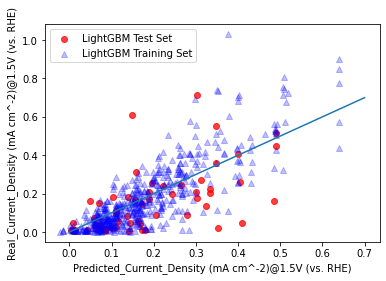

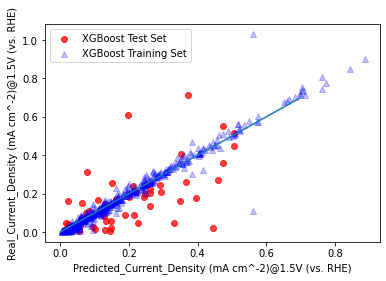

In [7]:
##########LGBM gridsearch CV for best hyperparameter##########
model_LightGBMRegressor=lightgbm.LGBMRegressor(random_state=1,verbose=-1)
param_light = {
'boosting_type':['gbdt','rf'],
'learning_rate':[0.001,0.002,0.004,0.005,0.006,0.008,0.01,0.02,0.04,0.06,0.05,0.06,0.08,0.1,0.12,0.14,0.15,0.16,0.18,0.2,0.4,0.5,0.6,0.8,1],
'subsample':[0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
'n_estimators':[50,100,200,400],
'max_depth':[5,7,9,11,13,-1],
'reg_alpha':[0,0.001,0.01,0.0001,0.00001],
'reg_lambda':[0,0.001,0.01,0.0001,0.00001]
}
gridsearch(model_LightGBMRegressor,param_light,'LightGBM')

##########XGBoost gridsearch CV for best hyperparameter##########
model_XGBRegressor=xgboost.XGBRegressor(objective='reg:squarederror',random_state=1,verbosity=0)
param_xg = {
'booster':['gbtree'],
'learning_rate':[0.001,0.002,0.004,0.005,0.006,0.008,0.01,0.02,0.04,0.06,0.05,0.06,0.08,0.1,0.12,0.14,0.15,0.16,0.18,0.2,0.4,0.5,0.6,0.8,1],
'n_estimators':[100,200,400],
'max_depth':[5,7,9,11,13],
'subsample':[0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
'reg_alpha':[0,0.001,0.01,0.0001,0.00001],
'reg_lambda':[0,0.001,0.01,0.0001,0.00001]
}
gridsearch(model_XGBRegressor,param_xg,'XGBoost')

##########CatBoost gridsearch CV for best hyperparameter##########
model_CatRegressor=catboost.CatBoostRegressor(random_state=1,verbose=0)
param_cat = {
'learning_rate':[0.001,0.002,0.004,0.005,0.006,0.008,0.01,0.02,0.04,0.06,0.05,0.06,0.08,0.1,0.12,0.14,0.15,0.16,0.18,0.2,0.4,0.5],
'n_estimators':[50,100,200,400],
"boosting_type":["Plain"],
'max_depth':[5,7,9,11],
'subsample':[0.4,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
'reg_lambda':[0,0.001,0.01,0.0001,0.00001]
}
gridsearch(model_CatRegressor,param_cat,'CatBoost')


###########GradientBoost gridsearch CV for best hyperparameter##########
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(random_state=1)
###########defining the parameters dictionary##########
param_GB = {
'learning_rate':[0.001,0.002,0.004,0.005,0.006,0.008,0.01,0.02,0.04,0.06,0.05,0.06,0.08,0.1,0.12,0.14,0.15,0.16,0.18,0.2,0.4,0.5,0.6,0.8,1],
'n_estimators':[50,100,200,400],
'max_depth':[3,5,7,9,11,13,16],
'criterion':['friedman_mse','mae','mse'],
'max_features':['auto','sqrt','log2'],
'loss':['ls', 'lad', 'huber', 'quantile']
}
gridsearch(model_GradientBoostingRegressor,param_GB,'GradientBoost')

###########RandomForest gridsearch CV for best hyperparameter##########
model_RandomForestRegressor = ensemble.RandomForestRegressor(random_state=1)
###########defining the parameters dictionary##########
param_RF = {
'n_estimators':[50,100,200,400,None],
'max_depth':[3,5,7,9,11,None],
'criterion':['mse','mae'],
'max_features':['auto','sqrt','log2']
}
gridsearch(model_RandomForestRegressor,param_RF,'Random Forest')


###########Extra Tree gridsearch CV for best hyperparameter##########
model_ExtraTreeRegressor = ExtraTreeRegressor(random_state=1)
param_ET = {
'max_depth':[5,6,7,8,9,10,11,None],
'max_features':['auto','sqrt','log2'],
'criterion' : ["mse", "friedman_mse", "mae"],
'splitter' : [ "best",'random']
}
gridsearch(model_ExtraTreeRegressor,param_ET,'Extra Tree')


###########Decision Tree gridsearch CV for best hyperparameter##########
model_DecisionTreeRegressor = tree.DecisionTreeRegressor(random_state=1)
param_DT = {
'max_depth':[5,6,7,8,9,10,11,None],
'max_features':['auto','sqrt','log2'],
'criterion' : ["mse", "friedman_mse", "mae"],
'splitter' : [ "best",'random']
}
gridsearch(model_DecisionTreeRegressor,param_DT,'Decision Tree')


###########AdaBoost gridsearch CV for best hyperparameter##########
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(random_state=1)
param_Ada = {
'n_estimators':[50,100,200,400,800],
'learning_rate':[0.001,0.002,0.004,0.005,0.006,0.008,0.01,0.02,0.04,0.06,0.05,0.06,0.08,0.1,0.12,0.14,0.15,0.16,0.18,0.2,0.4,0.5,0.6,0.8,1],
'loss':['linear', 'square', 'exponential']
}
gridsearch(model_AdaBoostRegressor,param_Ada,'AdaBoost')